I initially was using ensemlbe models but I found that toying with the hyperparameters a little bit more actually gave me an even better model, so my final model is made with the extratrees classifier. I still used 10-fold cv and got an average recall of 93% (2% lower than the ensemble model) and precision of 86% (10% higher than the ensemble model). 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns;
np.random.seed(30)

## Loading in data

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
print ("Fraud")
print (data.Amount[data.Class == 1].describe())
print "$",(data.Amount[data.Class == 1].sum()), "withdrawn"
print ("\n")
print ("Normal")
print (data.Amount[data.Class == 0].describe())
print "$",(data.Amount[data.Class == 0].sum()), "withdrawn"

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
$ 60127.97 withdrawn


Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
$ 25102462.04 withdrawn


## Dividing into features and output

In [5]:
X = data.drop('Class', axis = 1)
y = data['Class']


## Undersampling code

In [6]:
def under_sample(data):
    
    #Getting the indeces of fraud and normal transactions 
    fraud_indices = np.array(data[data.Class == 1].index)
    normal_indices = data[data.Class == 0].index

    # Randomly selecting 492 normal transactions (equal to the amount of fraud transactions)
    random_normal_indices = np.random.choice(normal_indices, 
                                             len(data[data.Class == 1]), replace = False)


    # Under sample dataset
    data_under_sample = data.iloc[np.concatenate([fraud_indices,random_normal_indices])]


    X_undersample = data_under_sample.drop('Class', axis = 1)
    Y_undersample = data_under_sample['Class']
    
    return(X_undersample, Y_undersample)

In [7]:
X_undersample, y_undersample = under_sample(data)

## Test train split for full and under sampled datasets

In [8]:
from sklearn.cross_validation import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 30)


# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 30)



In [9]:
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

## Confusion matrix code

In [10]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    else:
        1

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Personal function that calculates precision and accuracy

In [11]:
def precision_recall( y_test, prediction):
    true_positives  =  np.float(np.sum( (prediction == 1) & (y_test == 1)) )
    
    
    false_positives =  np.float(np.sum( (prediction == 1) & (y_test == 0)) )
    false_negatives =  np.float(np.sum( (prediction == 0) & (y_test == 1)) )
    
    
    precision = true_positives/(true_positives + false_positives)
    recall =  true_positives/(true_positives + false_negatives)
    
    
    precision = round(100*precision, 3)
    recall = round(100*recall, 3)
    
    return(precision, recall)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier

## Testing different models

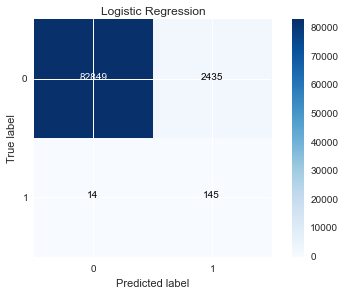

precision, recall =  (5.62, 91.195)


In [13]:
logreg = LogisticRegression()
logreg.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_logreg = logreg.predict(X_test.values)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_logreg)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Logistic Regression')
plt.show()

print "precision, recall = ", precision_recall( y_test, y_pred_logreg)

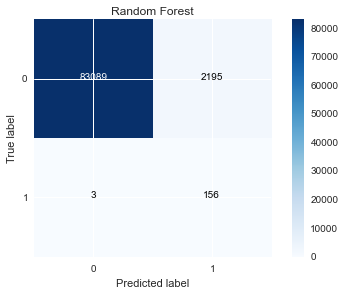

precision, recall =  (6.635, 98.113)


In [14]:
randomforest = RandomForestClassifier(n_estimators=500)
randomforest.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_randomforest = randomforest.predict(X_test.values)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_randomforest)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Random Forest')
plt.show()

print "precision, recall = ", precision_recall( y_test, y_pred_randomforest)

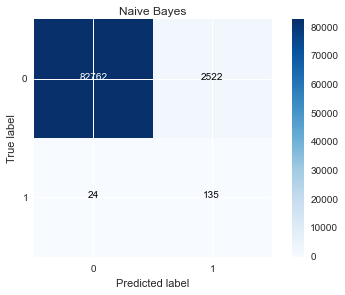

precision, recall =  (5.081, 84.906)


In [15]:
naivebayes =  GaussianNB()
naivebayes.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_naivebayes = naivebayes.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_naivebayes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Naive Bayes')
plt.show()

print "precision, recall = ", precision_recall( y_test, y_pred_naivebayes)

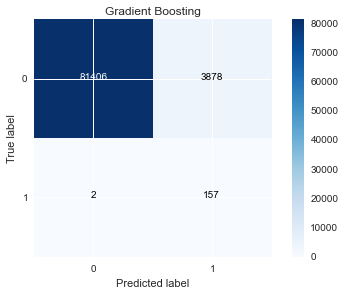

precision, recall =  (3.891, 98.742)


In [16]:
boost =  GradientBoostingClassifier( n_estimators=2000)
boost.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_boost = boost.predict(X_test.values)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_boost)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Gradient Boosting')
plt.show()

print "precision, recall = ", precision_recall( y_test, y_pred_boost)

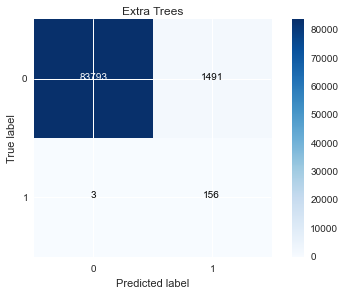

precision, recall =  (9.472, 98.113)


In [17]:
extratrees =  ExtraTreesClassifier(n_estimators=2000, criterion='entropy')
extratrees.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_extratrees = extratrees.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_extratrees)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Extra Trees')
plt.show()

print "precision, recall = ", precision_recall( y_test, y_pred_extratrees)

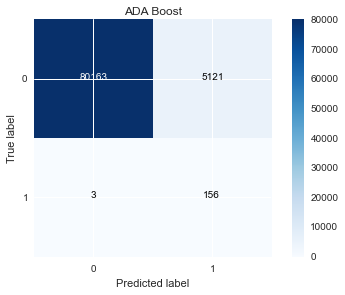

precision, recall =  (2.956, 98.113)


In [18]:
ada =  AdaBoostClassifier( n_estimators=2000)
ada.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_ada = ada.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_ada)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='ADA Boost')
plt.show()

print "precision, recall = ", precision_recall( y_test, y_pred_ada)

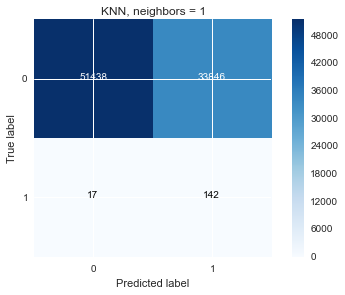

precision, recall =  (0.418, 89.308)


In [19]:
n_neighbors = 1
knn1 = KNeighborsClassifier(n_neighbors = n_neighbors)
knn1.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_knn1 = knn1.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_knn1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='KNN, neighbors = %s' %n_neighbors)
plt.show()

print "precision, recall = ", precision_recall( y_test, y_pred_knn1)

## Plotting ROC curves

In [20]:

Y_score_logreg = logreg.predict_proba(X_test)[:,1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, Y_score_logreg)

Y_score_boost = boost.predict_proba(X_test)[:,1]
fpr_boost, tpr_boost, _ = roc_curve(y_test, Y_score_boost)

Y_score_naivebayes = naivebayes.predict_proba(X_test)[:,1]
fpr_naivebayes, tpr_naivebayes, _ = roc_curve(y_test, Y_score_naivebayes)

Y_score_randomforest = randomforest.predict_proba(X_test)[:,1]
fpr_randomforest, tpr_randomforest, _ = roc_curve(y_test, Y_score_randomforest)

Y_score_ada = ada.predict_proba(X_test)[:,1]
fpr_ada, tpr_ada, _ = roc_curve(y_test, Y_score_ada)

Y_score_knn1 = knn1.predict_proba(X_test)[:,1]
fpr_knn1, tpr_knn1, _ = roc_curve(y_test, Y_score_knn1)

Y_score_extratrees = extratrees.predict_proba(X_test)[:,1]
fpr_extratrees , tpr_extratrees , _ = roc_curve(y_test, Y_score_extratrees )


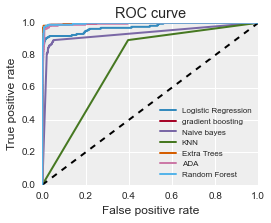

In [21]:
 
        
plt.style.use('bmh')
fig = plt.figure(1, figsize = (4,3))
fig.add_axes([0.2,0.2,0.75,0.75])
plt.title('ROC curve')
plt.plot(fpr_logreg, tpr_logreg, label = 'Logistic Regression' )
plt.plot(fpr_boost, tpr_boost, label = 'gradient boosting' )
plt.plot(fpr_naivebayes, tpr_naivebayes, label = 'Naive bayes' )
plt.plot(fpr_knn1, tpr_knn1, label = 'KNN')
plt.plot(fpr_extratrees , tpr_extratrees, label = 'Extra Trees')
plt.plot(fpr_ada, tpr_ada, label = 'ADA')
plt.plot(np.linspace(0., 1., 10), np.linspace(0., 1., 10), ls = '--', color = 'k')
plt.plot(fpr_randomforest, tpr_randomforest, label = 'Random Forest')
plt.legend(loc = 'lower right', fontsize = 8)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.savefig('temp.png', transparent=True)



## Calculating the AUC for different models

In [22]:
roc_auc_logreg       = roc_auc_score(y_test, Y_score_logreg      )
roc_auc_randomforest = roc_auc_score(y_test, Y_score_randomforest)
roc_auc_ada          = roc_auc_score(y_test, Y_score_ada)
roc_auc_extratrees   = roc_auc_score(y_test, Y_score_extratrees)
roc_auc_knn1         = roc_auc_score(y_test, Y_score_knn1)
roc_auc_naivebayes   = roc_auc_score(y_test, Y_score_naivebayes)
roc_auc_boost        = roc_auc_score(y_test, Y_score_boost)

In [23]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
                'Gradient Boost', 'KNN', 'ADA Boost',
                  'Extra Trees'],

    'AUC': [ roc_auc_logreg, 
         roc_auc_randomforest, roc_auc_naivebayes,
          roc_auc_boost, roc_auc_knn1, roc_auc_ada,
        roc_auc_extratrees
               
    ]})

In [24]:
models

,AUC,Model
0,0.972987,Logistic Regression
1,0.997012,Random Forest
2,0.932538,Naive Bayes
3,0.995932,Gradient Boost
4,0.748110,KNN
5,0.993246,ADA Boost
6,0.997886,Extra Trees


## Looking at model recall and precision for different thresholds

In [50]:
n_bins = 20
def f(y_test, Y_score, n_bins, method):
   
    precisions = []
    recalls = []
    for i in np.linspace(0., 0.99, n_bins):
        print i
        limit  = i
        Y_score_new = 1.*Y_score
        Y_score_new[Y_score_new < limit] = 0.
        Y_score_new[Y_score_new > limit] = 1.
        precision, recall =  precision_recall(y_test, Y_score_new)
        precisions.append(precisions)
        recalls.append(recall)
        
    
    threshold_data = pd.DataFrame(np.linspace(0., 0.99, n_bins), columns = ['Threshold'])
    
    threshold_data['Precision'] = np.array(precisions)
    threshold_data['Recall'] = np.array(recalls)
                                  
    #print method
    #threshold_data

In [ ]:
def f(y_test, Y_score, n_bins, method):
    print method
    precisions = []
    recalls = []
    for i in np.linspace(0., 0.99, n_bins):
        print i
        limit  = i
        Y_score_new = 1.*Y_score
        Y_score_new[Y_score_new < limit] = 0.
        Y_score_new[Y_score_new > limit] = 1.
        print i, precision_recall(y_test, Y_score_new)

        



In [27]:
def thresholds(y_test, Y_score, n_bins, method):
    print method
    precisions = []
    recalls = []
    for i in np.linspace(0., 0.99, n_bins):
        limit  = i
        Y_score_new = 1.*Y_score
        Y_score_new[Y_score_new < limit] = 0.
        Y_score_new[Y_score_new > limit] = 1.
        print i, precision_recall(y_test, Y_score_new)
        

In [28]:
thresholds(y_test, Y_score_randomforest, 20, 'random forest')

random forest
0.0 (0.188, 100.0)
0.0521052631579 (0.327, 100.0)
0.104210526316 (0.479, 100.0)
0.156315789474 (0.664, 100.0)
0.208421052632 (0.916, 99.371)
0.260526315789 (1.291, 99.371)
0.312631578947 (1.794, 98.742)
0.364736842105 (2.577, 98.742)
0.416842105263 (3.719, 98.742)
0.468947368421 (5.362, 98.742)
0.521052631579 (7.708, 98.113)
0.573157894737 (11.372, 97.484)
0.625263157895 (16.595, 97.484)
0.677368421053 (21.408, 95.597)
0.729473684211 (29.077, 93.082)
0.781578947368 (36.667, 89.937)
0.833684210526 (53.282, 86.792)
0.885789473684 (78.409, 86.792)
0.937894736842 (84.375, 84.906)
0.99 (88.333, 68.831)


In [29]:
thresholds(y_test, Y_score_ada, 20, 'ada')

ada
0.0 (0.186, 100.0)
0.0521052631579 (0.186, 100.0)
0.104210526316 (0.186, 100.0)
0.156315789474 (0.186, 100.0)
0.208421052632 (0.186, 100.0)
0.260526315789 (0.186, 100.0)
0.312631578947 (0.186, 100.0)
0.364736842105 (0.186, 100.0)
0.416842105263 (0.186, 100.0)
0.468947368421 (0.215, 100.0)
0.521052631579 (30.534, 75.472)
0.573157894737

ZeroDivisionError: float division by zero

In [30]:
thresholds(y_test, Y_score_boost, 20, 'gradient boost')

 gradient boost
0.0 (0.186, 100.0)
0.0521052631579 (2.018, 98.742)
0.104210526316 (2.4, 98.742)
0.156315789474 (2.672, 98.742)
0.208421052632 (2.901, 98.742)
0.260526315789 (3.091, 98.742)
0.312631578947 (3.25, 98.742)
0.364736842105 (3.441, 98.742)
0.416842105263 (3.628, 98.742)
0.468947368421 (3.797, 98.742)
0.521052631579 (3.951, 98.742)
0.573157894737 (4.132, 98.742)
0.625263157895 (4.344, 98.742)
0.677368421053 (4.575, 98.742)
0.729473684211 (4.841, 98.742)
0.781578947368 (5.168, 98.742)
0.833684210526 (5.567, 98.113)
0.885789473684 (6.147, 98.113)
0.937894736842 (7.25, 97.484)
0.99 (12.263, 97.484)


In [31]:
thresholds(y_test, Y_score_extratrees, 20, 'extratrees')

extratrees
0.0 (0.186, 100.0)
0.0521052631579 (0.282, 100.0)
0.104210526316 (0.479, 100.0)
0.156315789474 (0.75, 100.0)
0.208421052632 (1.097, 99.371)
0.260526315789 (1.597, 99.371)
0.312631578947 (2.364, 98.742)
0.364736842105 (3.463, 98.742)
0.416842105263 (4.971, 98.113)
0.468947368421 (7.242, 98.113)
0.521052631579 (11.183, 98.113)
0.573157894737 (16.578, 98.113)
0.625263157895 (24.723, 98.113)
0.677368421053 (35.24, 96.855)
0.729473684211 (43.429, 95.597)
0.781578947368 (58.462, 95.597)
0.833684210526 (78.756, 95.597)
0.885789473684 (80.423, 95.597)
0.937894736842 (84.916, 95.597)
0.99 (91.875, 92.453)


In [33]:
thresholds(y_test, Y_score_knn1, 20, 'KNN')

KNN
0.0 (0.418, 89.308)
0.0521052631579 (0.418, 89.308)
0.104210526316 (0.418, 89.308)
0.156315789474 (0.418, 89.308)
0.208421052632 (0.418, 89.308)
0.260526315789 (0.418, 89.308)
0.312631578947 (0.418, 89.308)
0.364736842105 (0.418, 89.308)
0.416842105263 (0.418, 89.308)
0.468947368421 (0.418, 89.308)
0.521052631579 (0.418, 89.308)
0.573157894737 (0.418, 89.308)
0.625263157895 (0.418, 89.308)
0.677368421053 (0.418, 89.308)
0.729473684211 (0.418, 89.308)
0.781578947368 (0.418, 89.308)
0.833684210526 (0.418, 89.308)
0.885789473684 (0.418, 89.308)
0.937894736842 (0.418, 89.308)
0.99 (0.418, 89.308)


## testing different threshold for extratrees model

In [34]:
limit=  0.94
Y_score_new = 1.*Y_score_extratrees
Y_score_new[Y_score_new < limit] = 0.
Y_score_new[Y_score_new > limit] = 1.



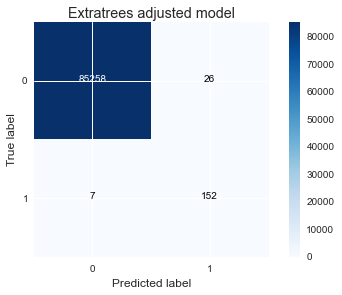

precision, recall =  (85.393, 95.597)


In [35]:
cnf_matrix = confusion_matrix(y_test,Y_score_new)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Extratrees adjusted model')
plt.show()

print "precision, recall = ", precision_recall(y_test,Y_score_new)


# 10 fold cross-validation for adjusted extratrees model

In [36]:
def cross_validator(data, X, y, cv, limit):
    
    model_precisions = []
    model_recalls = []
    
    i = 0
    while i < cv:
        #random.seed(i)
        X_undersample, Y_undersample = under_sample(data)
       
        # Whole dataset
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = i)


        # Undersampled dataset
        X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = i)
        
        
        extratrees =  ExtraTreesClassifier(n_estimators=2000, criterion='entropy')
        extratrees.fit(X_train_undersample,y_train_undersample.values.ravel())
       
        Y_score_extratrees = extratrees.predict_proba(X_test)[:,1]
        Y_score_new = 1.*Y_score_extratrees
        Y_score_new[Y_score_new < limit] = 0.
        Y_score_new[Y_score_new > limit] = 1.
        
        model_precision, model_recall = precision_recall(y_test,Y_score_new)
        
        model_recalls.append(model_recall)
        model_precisions.append(model_precision)
        
        i += 1
    
    model_recalls    = np.array(model_recalls)
    model_precisions = np.array(model_precisions)
        
    model_recalls_mean    = np.mean(model_recalls)
    model_precisions_mean = np.mean(model_precisions)
        
        
    return(model_recalls_mean, model_precisions_mean, model_recalls,model_precisions)
        
        

In [37]:
model_recalls_mean, model_precisions_mean, model_recalls,model_precisions = cross_validator(data, X, y, 10, 0.94)

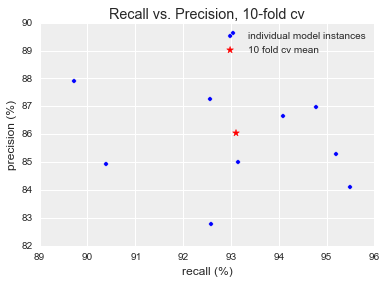

In [38]:
plt.figure(1)
plt.title('Recall vs. Precision, 10-fold cv')
plt.scatter(model_recalls, model_precisions,
            label = 'individual model instances')
plt.scatter(model_recalls_mean, model_precisions_mean, 
            marker = '*', s=50, color = 'r',
            label ='10 fold cv mean')
plt.xlabel('recall (%)')
plt.ylabel('precision (%)')
plt.legend(loc = 'upper right')

In [39]:
print "10 fold cross-validation, extratrees model"
print "Mean recall: ",  model_recalls_mean
print "Mean precision: ", model_precisions_mean

10 fold cross-validation, extratrees model
Mean recall:  93.1005
Mean precision:  86.0555
